<a href="https://colab.research.google.com/github/cslearning20xx/exploration/blob/master/Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pi estimation using MC

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial import distance
import math
from operator import truediv

In [0]:
def pi_estimator( numsimulations ):
  rand = np.random.uniform( -1, 1, 2*numsimulations )
  rand = np.reshape( rand,(numsimulations,2))
  dist = [ distance.euclidean( row, [0,0]) for row in rand ]
  within_circle = [ int(i <=1) for i in dist ]
  within_circle = np.cumsum(within_circle)
  pi_estimate = list(map(truediv, within_circle, list(range(1, numsimulations))))
  pi_estimate = np.array(pi_estimate) * 4 
  return pi_estimate


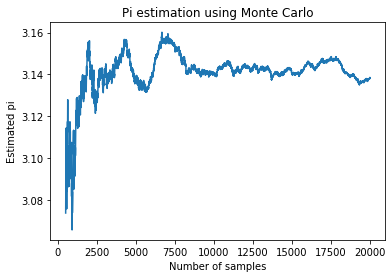

In [146]:
estimates = pi_estimator(20000)

start_iter = 500
x = list(range(len(estimates)))
plotdata = estimates[500:]
plt.plot(x[start_iter:], estimates[start_iter:])
plt.xlabel("Number of samples")
plt.ylabel("Estimated pi")
plt.title('Pi estimation using Monte Carlo')
plt.show()

Simple brownian motion

In [0]:
import numpy as np
from matplotlib import pyplot as plt

In [0]:
class path:

  def __init__(self, numpaths, t, n, drift = 0, sigma = 1 ):
    self.numpaths = numpaths
    self.t = t
    self.n = n
    self.dt = t/n
    self.drift = drift
    self.sigma = sigma
  
  def generate(self):
    self.paths = {}
    for pathnum in range(self.numpaths):
      temp = [0]
      for timeinterval in range(self.n):
        increment = self.drift * self.dt + self.sigma * np.random.normal( 0, np.sqrt(self.dt))
        temp.append(increment)
      self.paths[pathnum] = np.cumsum( temp )

  def showpaths(self):
    for path in self.paths.values():
      plt.plot(path)
    plt.title( 'Simulated paths with numpaths=' + str(self.numpaths) + ' n=' + str(self.n) +  " drift=" + str(self.drift) + " sigma=" + str(self.sigma))
    plt.show()
        
  def get_terminal_values(self):
    self.terminal_values = [ path[-1] for path in self.paths.values()]
    return self.terminal_values

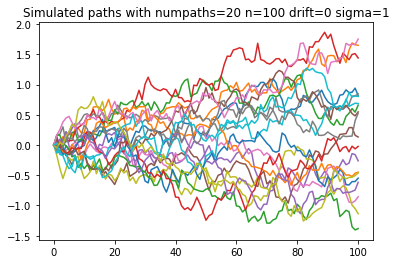

In [37]:
a = path(20, 1, 100, drift = 0, sigma = 1)
a.generate()
a.showpaths()